## The sentiment labels are:

### 0 - negative; 1 - somewhat negative; 2 - neutral; 3 - somewhat positive; 4 - positive

In [6]:
#import some necessary packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [7]:
data = pd.read_csv('train.tsv',sep='\t') 

In [8]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [10]:
# let us check the phrase of the first data of the dataset
data.iloc[0]['Phrase']

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [11]:
# let us check the phrase of the second data of the dataset
data.iloc[1]['Phrase']

'A series of escapades demonstrating the adage that what is good for the goose'

##  Exploratory Data Analysis

In [12]:
def get_polarity(data):
        # set sentiment
        if data['Sentiment'] == 0:
            return 'negative'
        elif data['Sentiment'] == 1:
            return 'somewhat negative'
        elif data['Sentiment']==2:
            return 'neuteral'
        elif data['Sentiment']==3:
            return 'somewhat positive'
        else:
            return 'positive'
          

In [13]:
data['Polarity'] = data.apply(get_polarity,axis=1)

In [14]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment,Polarity
0,1,1,A series of escapades demonstrating the adage ...,1,somewhat negative
1,2,1,A series of escapades demonstrating the adage ...,2,neuteral
2,3,1,A series,2,neuteral
3,4,1,A,2,neuteral
4,5,1,series,2,neuteral


Let's plot it!

neuteral             79582
somewhat positive    32927
somewhat negative    27273
positive              9206
negative              7072
Name: Polarity, dtype: int64


Text(0.5, 0, 'Sentiment expressed in Reviews')

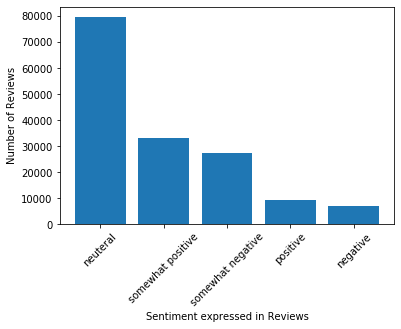

In [15]:

Index = [1,2,3,4,5]
print(data.Polarity.value_counts())
plt.bar(Index,data.Polarity.value_counts())
plt.xticks(Index,['neuteral','somewhat positive','somewhat negative','positive','negative'],rotation=45)
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment expressed in Reviews')


In [16]:
data.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
Polarity      0
dtype: int64

In [19]:
data['Length'] = data['Phrase'].apply(lambda x: len(str(x).split(' ')))

In [20]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment,Polarity,Length
0,1,1,A series of escapades demonstrating the adage ...,1,somewhat negative,37
1,2,1,A series of escapades demonstrating the adage ...,2,neuteral,14
2,3,1,A series,2,neuteral,2
3,4,1,A,2,neuteral,1
4,5,1,series,2,neuteral,1


In [21]:
data['Length'].unique()

array([37, 14,  2,  1, 12, 11, 10,  3,  7,  6,  5,  4, 23, 22, 20, 19, 18,
       15,  9,  8, 21, 26, 25, 16, 13, 17, 30, 28, 27, 24, 41, 40, 36, 29,
       31, 32, 34, 33, 42, 39, 38, 35, 43, 45, 44, 49, 48, 47, 46, 51, 50,
       52], dtype=int64)

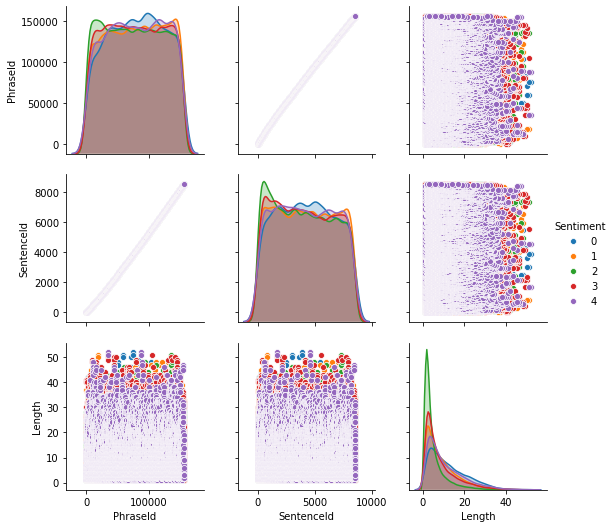

In [23]:
#check for any pattern
import seaborn as sns
sns.pairplot(data,hue='Sentiment',vars=['PhraseId','SentenceId','Length'])

#### so sentiment 4 has short length reviews but also has long length reviews. But mainly sentiment 0,1 and 2 have longer length reviews. 


## Text pre-processing 

In [26]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()

In [27]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all capitalized words
    2. Remove all punctuation
    3. Remove all stopwords
    4. Lemmatize the resultant cleaned phrase
    5. Finally returns the processed list of words
    """
    #Remove capitalized words (movie names, actor names, etc.)
    nocaps = [name for name in mess if name.islower()]
    
    #Join the characters again to form the string.
    nocaps = ' '.join(nocaps)
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in nocaps if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    nostopwords = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    # Join the characters again to form the string.
    nostopwords = ' '.join(nostopwords)
    nostopwords = nostopwords.split()
    #Lemmatize
    for i in range(0,len(nostopwords)):
        
        k = nostopwords.pop(0)
        if k not in string.punctuation:
            nostopwords.append(lm.lemmatize(k).lower())  
    
    return nostopwords

Let's do some oversampling to fix the class imbalance.

In [28]:
#because of our imbalanced classes (categorical labels) we can try over-sampling 
#(making copies of the under-represented classes)
sent_2 = data[data['Sentiment']==2] 
sent_0 = data[data['Sentiment']==0]#we will copy class 0, 11 times
sent_1 = data[data['Sentiment']==1]#we will copy class 1, 2 times
sent_3 = data[data['Sentiment']==3]#we will copy class 3, 2 times
sent_4 = data[data['Sentiment']==4]#we will copy class 4, 8 times

In [ ]:
data = data.append([sent_0,sent_0,sent_0,sent_0,sent_0,sent_0,sent_0,sent_0,sent_0,sent_0])
data = data.append([sent_1,sent_1])
data = data.append([sent_3])
data = data.append([sent_4,sent_4,sent_4,sent_4,sent_4,sent_4,sent_4])

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378695 entries, 0 to 156010
Data columns (total 6 columns):
PhraseId      378695 non-null int64
SentenceId    378695 non-null int64
Phrase        378695 non-null object
Sentiment     378695 non-null int64
Polarity      378695 non-null object
Length        378695 non-null int64
dtypes: int64(4), object(2)
memory usage: 30.2+ MB


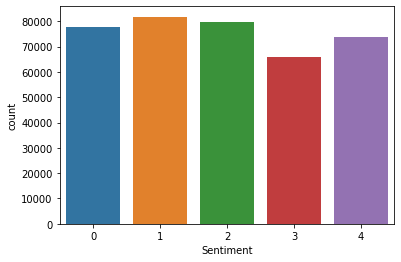

In [30]:
#to check the amounts of each class
sns.countplot(data=data,x='Sentiment')


In [32]:
from sklearn.model_selection import train_test_split
X = data['Phrase']
y = data['Sentiment']
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.25)


## Vectorisation & TF_IDF

### 1.Naive Bayes

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [36]:
pipeNB = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [37]:
pipeNB.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000207AD0B6F78>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [38]:
pred = pipeNB.predict(x_test) 

from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.25      0.07      0.11     19547
           1       0.22      0.64      0.33     20328
           2       0.27      0.33      0.30     19854
           3       0.00      0.00      0.00     16642
           4       0.26      0.09      0.13     18303

    accuracy                           0.24     94674
   macro avg       0.20      0.23      0.18     94674
weighted avg       0.21      0.24      0.18     94674



Naive Bayes doesn't perform well.Perhaps applying it on undersampled data may give better results and might push the accuracy a bit up.

But I am looking for models which would give accuracy above 70%. So let's explore!

### 2.Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
pipeDTC = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])
pipeDTC.fit(x_train,y_train)
pred = pipeDTC.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     19547
           1       0.78      0.79      0.79     20328
           2       0.66      0.58      0.62     19854
           3       0.74      0.63      0.68     16642
           4       0.87      0.97      0.91     18303

    accuracy                           0.79     94674
   macro avg       0.78      0.79      0.78     94674
weighted avg       0.78      0.79      0.78     94674



That's nice!

### 3.Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
pipeRFC = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [41]:
pipeRFC.fit(x_train,y_train)
pred = pipeRFC.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     19547
           1       0.77      0.77      0.77     20328
           2       0.67      0.61      0.64     19854
           3       0.75      0.66      0.70     16642
           4       0.89      0.97      0.92     18303

    accuracy                           0.80     94674
   macro avg       0.79      0.80      0.79     94674
weighted avg       0.79      0.80      0.79     94674



Ah! Almost similar!

#### Fine tuning might increase the accuracy.So Decision Tree and random Forests performed really good in this context.